In [1]:
import numpy as np
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
# read M flare data
f = h5py.File("../Mflare_data/M_flare_1h.hdf5","r")
v = f['HARP377']
frame = v['flare_2011.02.13_17:38:00']
br = np.array(frame['Br'])
PIL = np.array(frame['PIL_MASK'])

In [4]:
g = h5py.File("../Bflare_data/B_flare_1h.hdf5","r")
gv = g['HARP377']
bframe = gv['flare_2011.02.13_00:42:00']
b_br = np.array(bframe['Br'])
b_PIL = np.array(bframe['PIL_MASK'])

Text(0.5, 1, '(f) |Br| > 200 G & PIL mask')

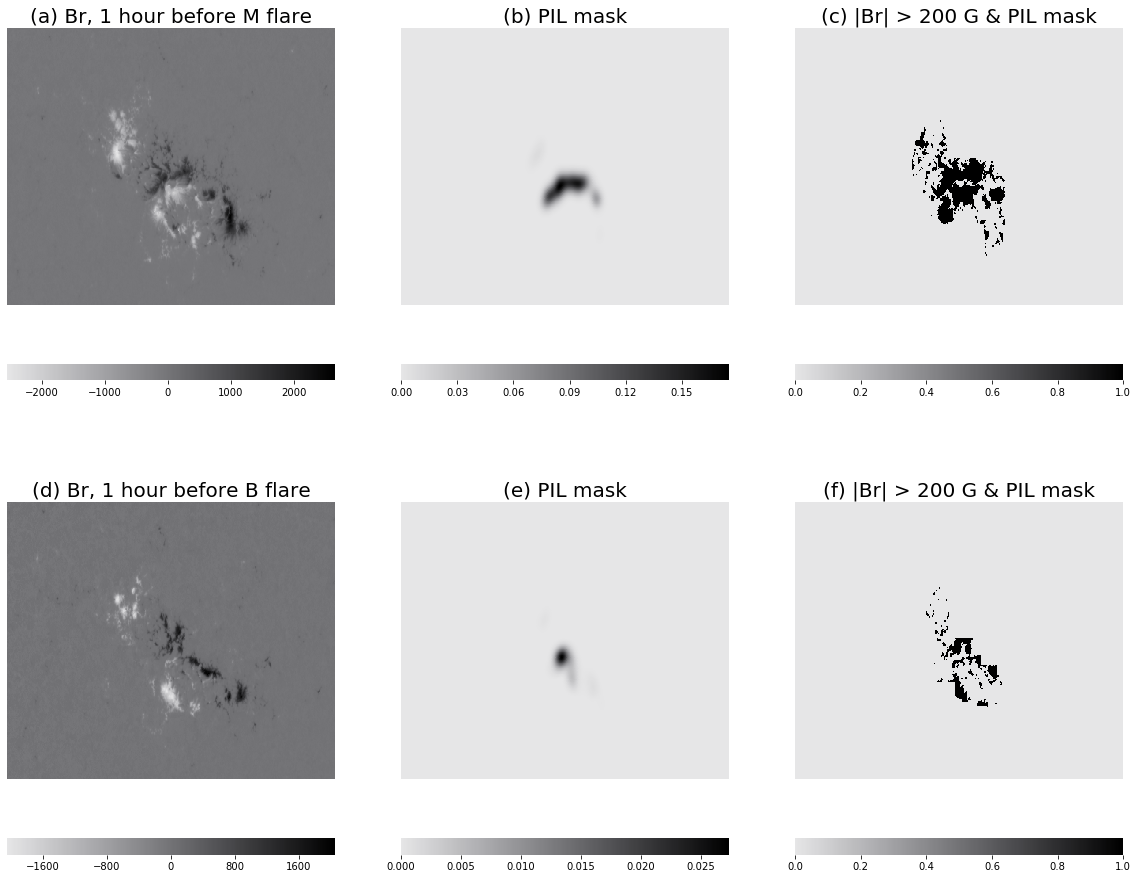

In [7]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True) # configure a grayscale cbar

fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(20,16))
ax[0,0] = plt.subplot(2,3,1)
sns.heatmap(br, xticklabels=False, yticklabels=False, cmap=cmap, cbar_kws = dict(use_gridspec=False,location="bottom"))
ax[0,0].set_title("(a) Br, 1 hour before M flare", fontsize=20)

ax[0,1] = plt.subplot(2,3,2)
sns.heatmap(PIL, xticklabels=False, yticklabels=False, cmap=cmap, cbar_kws = dict(use_gridspec=False,location="bottom"))
ax[0,1].set_title("(b) PIL mask", fontsize=20)

ax[0,2] = plt.subplot(2,3,3)
check = np.logical_and(np.abs(br)>200, PIL!=0)
sns.heatmap(check, xticklabels=False, yticklabels=False, cmap=cmap, cbar_kws = dict(use_gridspec=False,location="bottom"))
ax[0,2].set_title("(c) |Br| > 200 G & PIL mask", fontsize=20)

ax[1,0] = plt.subplot(2,3,4)
sns.heatmap(b_br, xticklabels=False, yticklabels=False, cmap=cmap, cbar_kws = dict(use_gridspec=False,location="bottom"))
ax[1,0].set_title("(d) Br, 1 hour before B flare", fontsize=20)

ax[1,1] = plt.subplot(2,3,5)
sns.heatmap(b_PIL, xticklabels=False, yticklabels=False, cmap=cmap, cbar_kws = dict(use_gridspec=False,location="bottom"))
ax[1,1].set_title("(e) PIL mask", fontsize=20)

ax[1,2] = plt.subplot(2,3,6)
check = np.logical_and(np.abs(b_br)>200, b_PIL!=0)
sns.heatmap(check, xticklabels=False, yticklabels=False, cmap=cmap, cbar_kws = dict(use_gridspec=False,location="bottom"))
ax[1,2].set_title("(f) |Br| > 200 G & PIL mask", fontsize=20)

In [8]:
fig.savefig("../paper_writing/channel_example.png",dpi=300)

In [9]:
f.close()
g.close()